In [ ]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Get path for data from Google Drive
metadata_path = '/content/drive/My Drive/281Project/raw_data/HAM10000_metadata.csv'
metadata_df = pd.read_csv(metadata_path)

Mounted at /content/drive


In [ ]:
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
features_path = '/content/drive/My Drive/281Project/Model Output Data/dataset/dataset.csv'
features_df = pd.read_csv(features_path)
features_df = features_df.rename(columns = {'Unnamed: 0': 'image_id'})

In [ ]:
features_df.head()

,image_id,lesion_skew_lbp,lesion_kurtosis_lbp,radial_mean_slope_lbp,radial_std_slope_lbp,max_mean_location_lbp,radial_std_gabor,lesion_skew_gabor,lesion_kurtosis_gabor,radial_mean_slope_gabor,...,value_histogram_246,value_histogram_247,value_histogram_248,value_histogram_249,value_histogram_250,value_histogram_251,value_histogram_252,value_histogram_253,value_histogram_254,value_histogram_255
0,ISIC_0024306,1.479220,1.698883,-0.271104,-0.867224,0.0,13.888199,-1.443745,0.942281,0.131855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ISIC_0024307,0.732745,-0.440050,-1.170712,-2.089826,1.0,4.813448,0.666198,-0.503684,-0.370137,...,6.0,3.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0
2,ISIC_0024308,1.532073,1.899544,-0.681541,-1.387129,0.0,8.677227,0.276372,-1.837979,-0.200521,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,-0.395309,-1.355692,-1.072684,-1.904152,1.0,1.743708,-2.130681,4.785650,0.774746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,0.704363,0.214108,-2.252855,-2.330819,2.0,3.699619,-1.024185,0.610274,0.111822,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
features_complex_path = '/content/drive/My Drive/281Project/Model Output Data/resnet50_pca.csv'
features_complex_df = pd.read_csv(features_complex_path)

In [ ]:
features_complex_df.head()

,image_id,resnet_feature_1,resnet_feature_2
0,ISIC_0027419,-43.716255,26.776880
1,ISIC_0025030,8.151252,86.473830
2,ISIC_0026769,-28.168400,18.195919
3,ISIC_0025661,4.097778,45.024480
4,ISIC_0031633,39.101196,6.386570


In [ ]:
features_combined_df = pd.merge(features_df, features_complex_df, on='image_id')
features_combined_df.head()

,image_id,lesion_skew_lbp,lesion_kurtosis_lbp,radial_mean_slope_lbp,radial_std_slope_lbp,max_mean_location_lbp,radial_std_gabor,lesion_skew_gabor,lesion_kurtosis_gabor,radial_mean_slope_gabor,...,value_histogram_248,value_histogram_249,value_histogram_250,value_histogram_251,value_histogram_252,value_histogram_253,value_histogram_254,value_histogram_255,resnet_feature_1,resnet_feature_2
0,ISIC_0024306,1.479220,1.698883,-0.271104,-0.867224,0.0,13.888199,-1.443745,0.942281,0.131855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-12.626515,-24.025381
1,ISIC_0024307,0.732745,-0.440050,-1.170712,-2.089826,1.0,4.813448,0.666198,-0.503684,-0.370137,...,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,-32.604120,-13.757582
2,ISIC_0024308,1.532073,1.899544,-0.681541,-1.387129,0.0,8.677227,0.276372,-1.837979,-0.200521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.057323,-71.462944
3,ISIC_0024309,-0.395309,-1.355692,-1.072684,-1.904152,1.0,1.743708,-2.130681,4.785650,0.774746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.492596,1.062465
4,ISIC_0024310,0.704363,0.214108,-2.252855,-2.330819,2.0,3.699619,-1.024185,0.610274,0.111822,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,58.565070,33.992110


In [ ]:
lesion_df = pd.merge(metadata_df, features_combined_df, on='image_id')
lesion_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,lesion_skew_lbp,lesion_kurtosis_lbp,...,value_histogram_248,value_histogram_249,value_histogram_250,value_histogram_251,value_histogram_252,value_histogram_253,value_histogram_254,value_histogram_255,resnet_feature_1,resnet_feature_2
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,1.442068,2.488431,...,2.0,4.0,6.0,2.0,7.0,6.0,4.0,12.0,-43.716255,26.776880
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0.740869,-1.572161,...,13.0,13.0,15.0,5.0,6.0,2.0,2.0,14.0,8.151252,86.473830
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,-0.747317,-1.231359,...,10.0,10.0,2.0,4.0,2.0,1.0,2.0,10.0,-28.168400,18.195919
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,-1.136369,0.619139,...,14.0,11.0,8.0,4.0,8.0,3.0,6.0,16.0,4.097778,45.024480
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0.376405,-0.637287,...,6.0,12.0,5.0,6.0,3.0,2.0,2.0,16.0,39.101196,6.386570


In [ ]:
print(len(lesion_df))

10015


In [ ]:
unique_values_dx = lesion_df['dx'].unique()
print("Lesion classes to predict:", unique_values_dx)

Lesion classes to predict: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


## Remove duplicates

In [ ]:
lesion_df = lesion_df.drop_duplicates(subset = 'lesion_id')

In [ ]:
print(len(lesion_df))

7470


## Missing Data

In [ ]:
nan_counts = lesion_df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print(columns_with_nan)

age                                          52
lesion_skew_lbp                             108
lesion_kurtosis_lbp                         108
radial_mean_slope_lbp                       108
radial_std_slope_lbp                        108
max_mean_location_lbp                       108
radial_std_gabor                            111
lesion_skew_gabor                           111
lesion_kurtosis_gabor                       111
radial_mean_slope_gabor                     111
radial_std_slope_gabor                      111
difference_from_skin_gabor                  112
lesion_region_inter_quartile_range_gabor    111
max_std_location_gabor                      111
dtype: int64


In [ ]:
# Calculate the mean of the 'age' column
mean_age = lesion_df['age'].mean()

# Fill NaN values in the 'age' column with the mean age
lesion_df['age'] = lesion_df['age'].fillna(mean_age)

# List of columns to fill NaN with 0
columns_to_fill_with_zero = [
    'lesion_skew_lbp',
    'lesion_kurtosis_lbp',
    'radial_mean_slope_lbp',
    'radial_std_slope_lbp',
    'max_mean_location_lbp',
    'radial_std_gabor',
    'lesion_skew_gabor',
    'lesion_kurtosis_gabor',
    'radial_mean_slope_gabor',
    'radial_std_slope_gabor',
    'difference_from_skin_gabor',
    'lesion_region_inter_quartile_range_gabor',
    'max_std_location_gabor'
]

# Fill NaN values in the specified columns with 0
lesion_df[columns_to_fill_with_zero] = lesion_df[columns_to_fill_with_zero].fillna(0)

In [ ]:
nan_counts = lesion_df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print(columns_with_nan)

Series([], dtype: int64)


## Preprocessing

In [ ]:
# Separate features and labels
X = lesion_df.drop(columns=['lesion_id', 'image_id', 'dx'])
Y = lesion_df['dx']

In [ ]:
X.head()

,dx_type,age,sex,localization,dataset,lesion_skew_lbp,lesion_kurtosis_lbp,radial_mean_slope_lbp,radial_std_slope_lbp,max_mean_location_lbp,...,value_histogram_248,value_histogram_249,value_histogram_250,value_histogram_251,value_histogram_252,value_histogram_253,value_histogram_254,value_histogram_255,resnet_feature_1,resnet_feature_2
0,histo,80.0,male,scalp,vidir_modern,1.442068,2.488431,-0.465489,0.995053,1.0,...,2.0,4.0,6.0,2.0,7.0,6.0,4.0,12.0,-43.716255,26.776880
2,histo,80.0,male,scalp,vidir_modern,-0.747317,-1.231359,0.602933,0.928483,3.0,...,10.0,10.0,2.0,4.0,2.0,1.0,2.0,10.0,-28.168400,18.195919
4,histo,75.0,male,ear,vidir_modern,0.376405,-0.637287,0.994586,3.066614,6.0,...,6.0,12.0,5.0,6.0,3.0,2.0,2.0,16.0,39.101196,6.386570
6,histo,60.0,male,face,vidir_modern,1.150257,0.235648,-0.557974,-2.065004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.125838,16.745090
8,histo,70.0,female,back,vidir_modern,-0.568040,0.334529,1.839841,-3.356598,5.0,...,9.0,7.0,5.0,0.0,1.0,3.0,1.0,10.0,8.233109,26.227266


In [ ]:
Y.head()

0    bkl
2    bkl
4    bkl
6    bkl
8    bkl
Name: dx, dtype: object

In [ ]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Separate numerical and categorical features
X_numerical = X.drop(columns=categorical_columns)
X_categorical = X[categorical_columns]

# Scale only the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Combine scaled numerical features and categorical features
X_scaled = pd.DataFrame(X_numerical_scaled, columns=X_numerical.columns)
X_scaled = pd.concat([X_scaled, X_categorical.reset_index(drop=True)], axis=1)

In [ ]:
# Apply one-hot encoding to categorical columns
X_scaled_encoded = pd.get_dummies(X_scaled, columns=categorical_columns)

In [ ]:
# Split the data into 70% training and 30% remaining (validation + test)
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X_scaled_encoded, Y, test_size=0.30, random_state=42, stratify=Y)

# Split the remaining 30% data into 50% validation and 50% test (15% each)
X_val, X_test, Y_val, Y_test = train_test_split(X_remaining, Y_remaining, test_size=0.50, random_state=42, stratify=Y_remaining)

# Shuffle the test data
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)
Y_test = Y_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the splits to verify
print(f'Training set shape: {X_train.shape}, {Y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {Y_val.shape}')
print(f'Test set shape: {X_test.shape}, {Y_test.shape}')

Training set shape: (5229, 814), (5229,)
Validation set shape: (1120, 814), (1120,)
Test set shape: (1121, 814), (1121,)


In [ ]:
X_train.head()

,age,lesion_skew_lbp,lesion_kurtosis_lbp,radial_mean_slope_lbp,radial_std_slope_lbp,max_mean_location_lbp,radial_std_gabor,lesion_skew_gabor,lesion_kurtosis_gabor,radial_mean_slope_gabor,...,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,dataset_rosendahl,dataset_vidir_modern,dataset_vidir_molemax,dataset_vienna_dias
4629,-1.043814,-0.591324,-1.149587,1.051978,0.799482,2.409383,-0.861494,-1.803533,1.846830,0.839331,...,False,False,False,False,False,False,False,False,True,False
5436,-0.730522,-0.129839,-1.053923,0.424023,0.531498,1.131291,1.565953,1.963956,2.171012,-0.273560,...,False,False,False,False,False,False,False,False,True,False
2044,-0.730522,0.649781,-0.285515,-0.441065,-0.422894,-0.785847,-0.907268,-0.560760,0.686145,1.078930,...,False,False,False,False,False,True,False,False,True,False
2817,-0.417230,0.457590,0.518954,-1.423134,-0.789210,-0.785847,-0.591107,0.260049,-1.226409,0.476399,...,False,False,False,True,False,False,False,False,True,False
5107,-0.730522,0.911755,0.090253,0.190160,0.428678,-0.785847,-0.878253,0.424894,0.453322,-0.194255,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
Y_train.head()

5769    nv
6576    nv
3184    nv
3957    nv
6247    nv
Name: dx, dtype: object

## Model Building

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

## Model Evaluation

In [ ]:
# Evaluate the model on the validation data
Y_val_pred = model.predict(X_val)
print("Validation Data Evaluation:")
print("Accuracy:", accuracy_score(Y_val, Y_val_pred))
print(classification_report(Y_val, Y_val_pred))

Validation Data Evaluation:
Accuracy: 0.725
              precision    recall  f1-score   support

       akiec       0.27      0.41      0.33        34
         bcc       0.26      0.41      0.32        49
         bkl       0.48      0.50      0.49       109
          df       0.19      0.45      0.26        11
         mel       0.36      0.59      0.44        92
          nv       0.97      0.81      0.88       810
        vasc       0.39      0.60      0.47        15

    accuracy                           0.73      1120
   macro avg       0.42      0.54      0.46      1120
weighted avg       0.80      0.72      0.75      1120



In [ ]:
# Evaluate the model on the test data
Y_test_pred = model.predict(X_test)
print("Test Data Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Test Data Evaluation:
Accuracy: 0.7573595004460303
              precision    recall  f1-score   support

       akiec       0.38      0.57      0.45        35
         bcc       0.38      0.45      0.41        49
         bkl       0.52      0.52      0.52       109
          df       0.21      0.45      0.29        11
         mel       0.36      0.60      0.45        92
          nv       0.98      0.84      0.90       811
        vasc       0.38      0.71      0.50        14

    accuracy                           0.76      1121
   macro avg       0.46      0.59      0.50      1121
weighted avg       0.82      0.76      0.78      1121



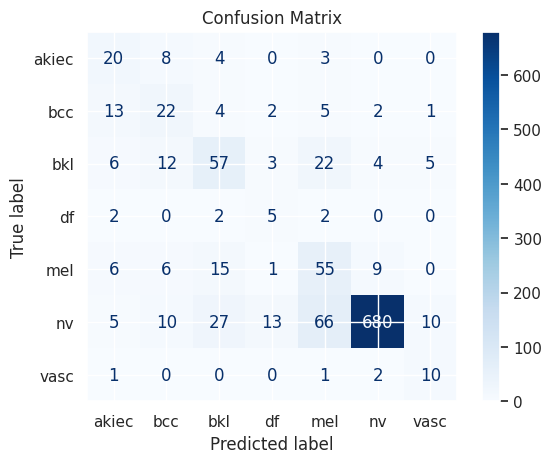

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()